### **Global Cancer Patients: 2015 - 2024**

### **Import libraries**

In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


### **Load Data**

In [2]:
df = pd.read_csv(r"C:\Users\R\Desktop\Data Analysis\Datasets\global_cancer_patients_2015_2024.csv")

In [3]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Country_Region         50000 non-null  object 
 3   Year                   50000 non-null  int64  
 4   Genetic_Risk           50000 non-null  float64
 5   Air_Pollution          50000 non-null  float64
 6   Alcohol_Use            50000 non-null  float64
 7   Smoking                50000 non-null  float64
 8   Obesity_Level          50000 non-null  float64
 9   Cancer_Type            50000 non-null  object 
 10  Cancer_Stage           50000 non-null  object 
 11  Treatment_Cost_USD     50000 non-null  float64
 12  Survival_Years         50000 non-null  float64
 13  Target_Severity_Score  50000 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 5.3+ 

In [4]:
df.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


### **Explore data**

#### Univariate Analysis

1. Age Distribution

In [5]:
df["Age"].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

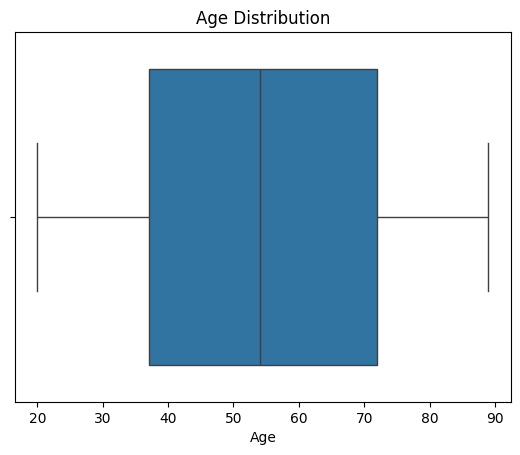

In [6]:
sns.boxplot(x="Age", data=df,)
plt.title("Age Distribution");

2. Cancer Type

In [7]:
df["Cancer_Type"].value_counts()/1000

Cancer_Type
Colon       6.376
Prostate    6.308
Leukemia    6.266
Liver       6.249
Skin        6.231
Cervical    6.222
Breast      6.189
Lung        6.159
Name: count, dtype: float64

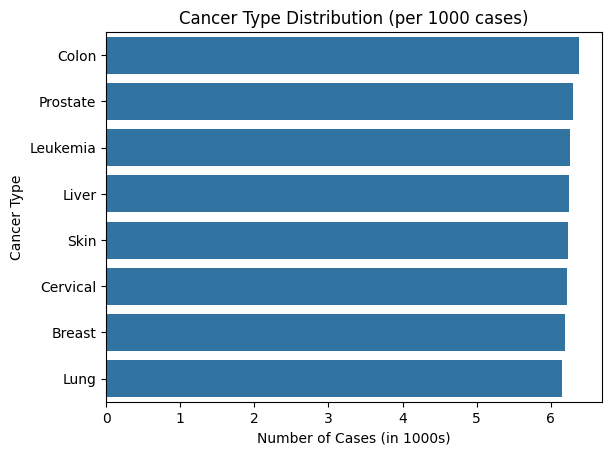

In [8]:
sns.barplot(df["Cancer_Type"].value_counts()/1000, orient = "h")
plt.xlabel("Number of Cases (in 1000s)")
plt.ylabel("Cancer Type")
plt.title("Cancer Type Distribution (per 1000 cases)");

3. Target_Severity_Score Distribution

In [9]:
df["Target_Severity_Score"].describe()

count    50000.000000
mean         4.951207
std          1.199677
min          0.900000
25%          4.120000
50%          4.950000
75%          5.780000
max          9.160000
Name: Target_Severity_Score, dtype: float64

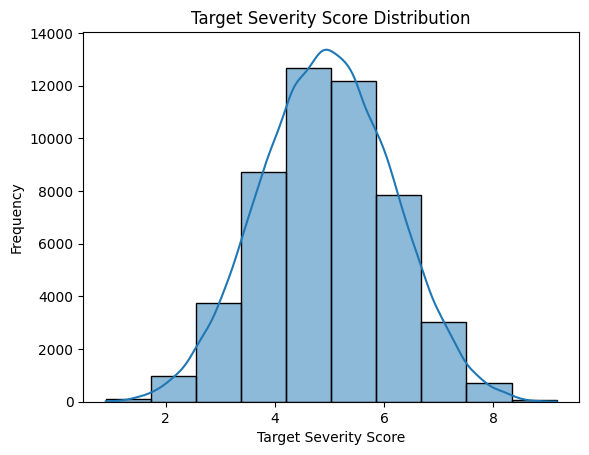

In [10]:
sns.histplot(df["Target_Severity_Score"], bins = 10, kde = True)
plt.xlabel("Target Severity Score")
plt.ylabel("Frequency")
plt.title("Target Severity Score Distribution");

4. Target Severity Score Over Years (2015 - 2024)

In [11]:
df.groupby("Year")["Target_Severity_Score"].mean().round(2)

Year
2015    4.95
2016    4.93
2017    4.97
2018    4.96
2019    4.95
2020    4.95
2021    4.93
2022    4.96
2023    4.96
2024    4.96
Name: Target_Severity_Score, dtype: float64

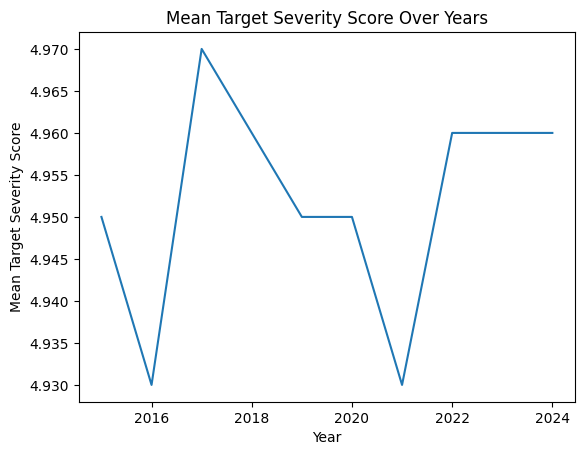

In [12]:
sns.lineplot(df.groupby("Year")["Target_Severity_Score"].mean().round(2))
plt.xlabel("Year")
plt.ylabel("Mean Target Severity Score")
plt.title("Mean Target Severity Score Over Years");

#### Bivariate Analysis

In [13]:
df.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [14]:
df["Smoking"].describe()

count    50000.000000
mean         4.989826
std          2.881579
min          0.000000
25%          2.500000
50%          5.000000
75%          7.500000
max         10.000000
Name: Smoking, dtype: float64

In [15]:
correlation = df.select_dtypes(include=['number'])
correlation = correlation.corr()
correlation

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
Age,1.000000,-0.002505,0.002229,0.001101,-0.004130,0.001734,-0.002706,0.003591,-0.000147,-0.001481
Year,-0.002505,1.000000,0.009942,0.000649,0.001934,-0.006209,-0.002441,0.000061,0.000018,0.002109
Genetic_Risk,0.002229,0.009942,1.000000,-0.004492,-0.002558,-0.003718,0.003522,-0.002365,0.001708,0.478700
Air_Pollution,0.001101,0.000649,-0.004492,1.000000,0.003511,0.003549,0.006507,-0.007566,0.000893,0.366963
Alcohol_Use,-0.004130,0.001934,-0.002558,0.003511,1.000000,-0.002938,0.007425,-0.003608,-0.000527,0.363250
Smoking,0.001734,-0.006209,-0.003718,0.003549,-0.002938,1.000000,0.005828,-0.009169,0.001371,0.484420
Obesity_Level,-0.002706,-0.002441,0.003522,0.006507,0.007425,0.005828,1.000000,-0.001251,0.009771,0.251366
Treatment_Cost_USD,0.003591,0.000061,-0.002365,-0.007566,-0.003608,-0.009169,-0.001251,1.000000,-0.000429,-0.466058
Survival_Years,-0.000147,0.000018,0.001708,0.000893,-0.000527,0.001371,0.009771,-0.000429,1.000000,0.004161
Target_Severity_Score,-0.001481,0.002109,0.478700,0.366963,0.363250,0.484420,0.251366,-0.466058,0.004161,1.000000


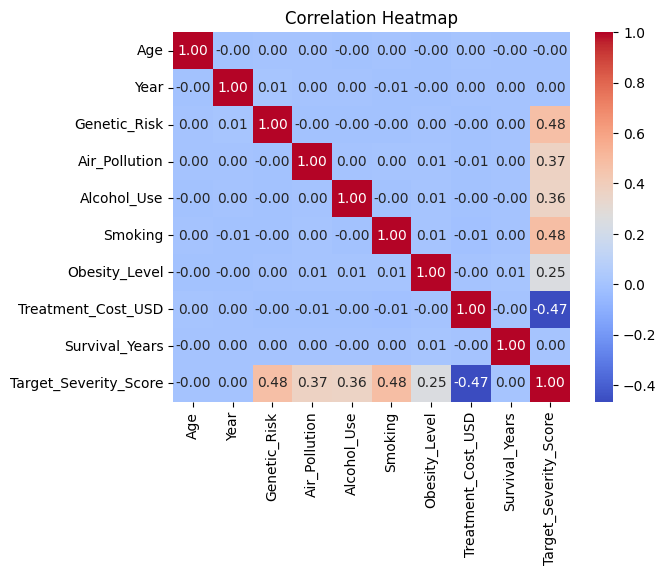

In [16]:
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show();

In [17]:
df.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


#### **Feature Engineering**

Target_Severity_Score

In [22]:
df["Target_Severity_Score"].head()

0    4.92
1    4.65
2    5.84
3    3.12
4    3.62
Name: Target_Severity_Score, dtype: float64

Create a new column; Severity_Score

In [23]:
# Round the scores to 2 decimal places
df["Target_Severity_Score"] = df["Target_Severity_Score"].round(2)

In [24]:
# Define bins and labels
bins = [0.0, 3.3, 6.6, 10.0]
labels = ["Mild", "Moderate", "Severe"]

In [25]:
# Create new column
df["Severity_Category"] = pd.cut(df["Target_Severity_Score"], bins=bins, labels=labels, include_lowest=True)

In [26]:
df["Severity_Category"].value_counts()

Severity_Category
Moderate    41348
Mild         4333
Severe       4319
Name: count, dtype: int64

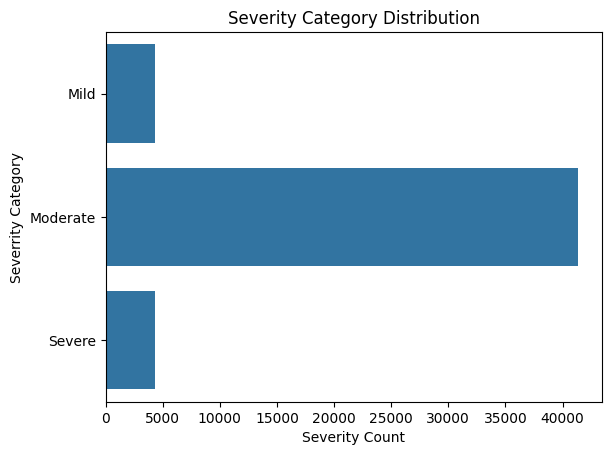

In [38]:
sns.barplot(df["Severity_Category"].value_counts(), orient = "h")
plt.xlabel("Severity Count")
plt.ylabel("Severrity Category")
plt.title("Severity Category Distribution");

#### Bivariate Analysis

Age vs Severity_Category

In [41]:
df.groupby("Severity_Category")["Age"].median().round(2)

Severity_Category
Mild        54.0
Moderate    55.0
Severe      54.0
Name: Age, dtype: float64

Text(0, 0.5, 'Age')

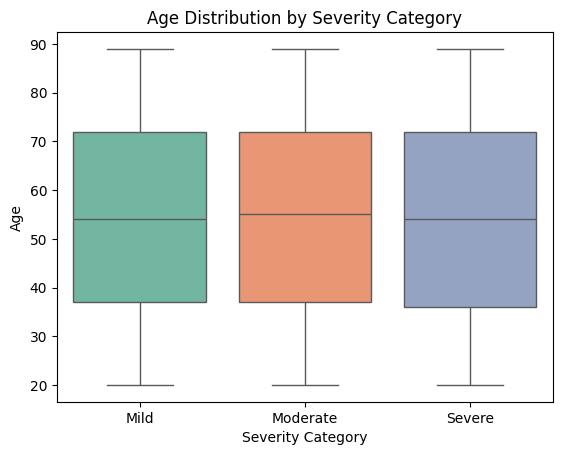

In [47]:
sns.boxplot(x="Severity_Category", y="Age", data=df, palette="Set2")
plt.title("Age Distribution by Severity Category")
plt.xlabel("Severity Category")
plt.ylabel("Age")

Does Mean Age differ significantly across Severity Categories?

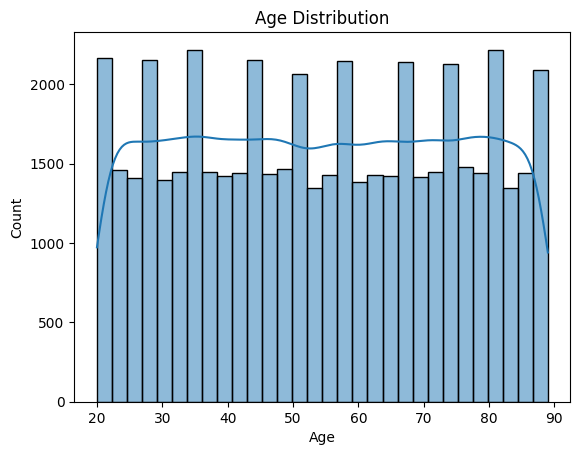

In [50]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count");


In [52]:
# Group ages by severity categories
mild_age = df[df['Severity_Category'] == 'Mild']['Age']
moderate_age = df[df['Severity_Category'] == 'Moderate']['Age']
severe_age = df[df['Severity_Category'] == 'Severe']['Age']

ANOVA: Parametric

In [54]:
# One-way ANOVA
anova_result = stats.f_oneway(mild_age, moderate_age, severe_age)
anova_result

F_onewayResult(statistic=np.float64(0.2319442180458219), pvalue=np.float64(0.7929912098953138))

Kruskal-Wallis: Non-Parametric

In [57]:
# Kruskal-Wallis test
kruskal_result = stats.kruskal(mild_age, moderate_age, severe_age)
kruskal_result

KruskalResult(statistic=np.float64(0.45821135208265557), pvalue=np.float64(0.7952444907748478))

Ordinal Logistic Regression (Association Modeling)

In [59]:
# Encode severity categories in ordinal order
df['Severity_Category'] = pd.Categorical(
    df['Severity_Category'], 
    categories=['Mild', 'Moderate', 'Severe'], 
    ordered=True
)

In [61]:
# Define model
model = OrderedModel(df['Severity_Category'],
                     df[['Age']],   # predictors
                     distr='logit') # or 'probit'

In [63]:
result = model.fit(method='bfgs')
result.summary()

Optimization terminated successfully.
         Current function value: 0.580616
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:      Severity_Category   Log-Likelihood:                -29031.
Model:                   OrderedModel   AIC:                         5.807e+04
Method:            Maximum Likelihood   BIC:                         5.809e+04
Date:                Sun, 24 Aug 2025                                         
Time:                        15:14:02                                         
No. Observations:               50000                                         
Df Residuals:                   49997                                         
Df Model:                           1                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age              5.048e-05      0.001      0.087      0.931      -0.001       0.001
Mild/Moderate      -2.3524      0.035    -66.356      0.000      -2.422      -2.283
Moderate/Severe     1.5505      0.005    341.448      0.000       1.542       1.559
===================================================================================
"""

Odds Ratios from Ordinal Logistic Regression

In [66]:
# Extract coefficients
params = result.params
params

Age                0.000050
Mild/Moderate     -2.352378
Moderate/Severe    1.550495
dtype: float64

In [67]:
# Exponentiate the Age coefficient to get odds ratio
odds_ratio = np.exp(params['Age'])
print(f"Odds Ratio for Age: {odds_ratio:.3f}")

Odds Ratio for Age: 1.000


Odds ratio = 1.000; Age has no effect on the likelihood of moving from one severity category (Mild → Moderate → Severe).

#### **Cancer_Stage vs Severity_Category**

In [76]:
df["Cancer_Stage"].value_counts()

Cancer_Stage
Stage II     10124
Stage I      10046
Stage III    10008
Stage IV      9933
Stage 0       9889
Name: count, dtype: int64

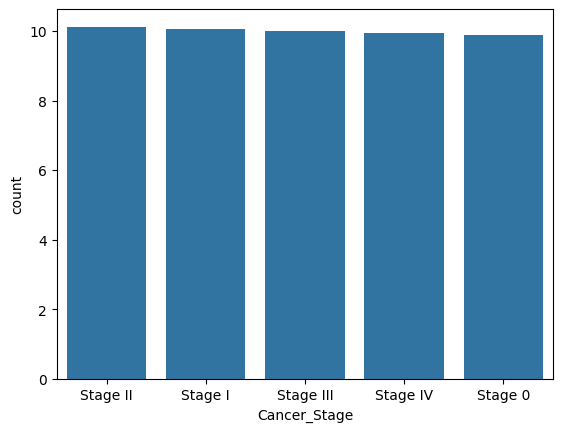